# LeNet Lab
![LeNet Architecture](lenet.png)
Source: Yan LeCun

## Load Data

Load the MNIST data, which comes pre-loaded with TensorFlow.

You do not need to modify this section.

In [1]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", reshape=False)
X_train, y_train           = mnist.train.images, mnist.train.labels
X_validation, y_validation = mnist.validation.images, mnist.validation.labels
X_test, y_test             = mnist.test.images, mnist.test.labels

assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz

Image Shape: (28, 28, 1)

Training Set:   55000 samples
Validation Set: 5000 samples
Test Set:       10000 samples


The MNIST data that TensorFlow pre-loads comes as 28x28x1 images.

However, the LeNet architecture only accepts 32x32xC images, where C is the number of color channels.

In order to reformat the MNIST data into a shape that LeNet will accept, we pad the data with two rows of zeros on the top and bottom, and two columns of zeros on the left and right (28+2+2 = 32).

You do not need to modify this section.

In [2]:
import numpy as np

# Pad images with 0s
X_train      = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_validation = np.pad(X_validation, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test       = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')
    
print("Updated Image Shape: {}".format(X_train[0].shape))

Updated Image Shape: (32, 32, 1)


## Visualize Data

View a sample from the dataset.

You do not need to modify this section.

9


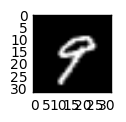

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])

## Preprocess Data

Shuffle the training data.

You do not need to modify this section.

In [4]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

You do not need to modify this section.

In [5]:
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 32

## TODO: Implement LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

This is the only cell you need to edit.
### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [6]:
from tensorflow.contrib.layers import flatten

def LeNet(x, train):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    layer_depth = {
        'layer_1' : 6,
        'layer_2' : 16,
        'flatten' : 400,
        'fc_1' : 120, 
        'fc_2' : 84,
        'logits' : 10
    }
    
    weights = {
        'layer_1' : tf.Variable(tf.truncated_normal(
        [5, 5, 1, layer_depth['layer_1']])),
        'layer_2' : tf.Variable(tf.truncated_normal(
        [5, 5, layer_depth['layer_1'], layer_depth['layer_2']])),
        'fc_1' : tf.Variable(tf.truncated_normal(
        [layer_depth['flatten'], layer_depth['fc_1']])),
        'fc_2' : tf.Variable(tf.truncated_normal(
        [layer_depth['fc_1'], layer_depth['fc_2']])),
        'logits' : tf.Variable(tf.truncated_normal(
        [layer_depth['fc_2'], layer_depth['logits']]))
        
                                

        
    }
    
    biases = {
        'layer_1' : tf.Variable(tf.zeros(layer_depth['layer_1'])),
        'layer_2' : tf.Variable(tf.zeros(layer_depth['layer_2'])),
        'fc_1' : tf.Variable(tf.zeros(layer_depth['fc_1'])),
        'fc_2' : tf.Variable(tf.zeros(layer_depth['fc_2'])),
        'logits' : tf.Variable(tf.zeros(layer_depth['logits']))
    }
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1 = tf.nn.conv2d(x, weights['layer_1'], strides = [1,1,1,1], padding = "VALID")
    conv1 = tf.nn.bias_add(conv1, biases['layer_1'])
    
    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)
#     with tf.Session() as sess:
#         sess.run(print(conv1.get_shape()))
        
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    pool1 = tf.nn.max_pool(conv1, ksize = [1,2,2,1], strides = [1,2,2,1], padding = "VALID")
#     with tf.Session() as sess:
#         sess.run(print(pool1.get_shape()))
        
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    conv2 = tf.nn.conv2d(pool1, weights['layer_2'], strides = [1,1,1,1], padding = "VALID")
    conv2 = tf.nn.bias_add(conv2, biases['layer_2'])
#     with tf.Session() as sess:
#         sess.run(print(conv2.get_shape()))
        
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2) 

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    pool2 = tf.nn.max_pool(conv2, ksize = [1, 6, 6, 1], strides = [1,1,1,1], padding = "VALID")
#     with tf.Session() as sess:
#         sess.run(print(pool2.get_shape()))

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    flatten = tf.reshape(pool2, [-1, layer_depth['flatten']])
#     with tf.Session() as sess:
#         sess.run(print(flatten.get_shape()))
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc_1 = tf.add(tf.matmul(flatten, weights['fc_1']), biases['fc_1'])
    
    # TODO: Activation.
    if train:
        fc_1 = tf.nn.dropout(tf.nn.relu(fc_1), 0.5)
    else:
        fc_1 = tf.nn.relu(fc_1)
    
#     with tf.Session() as sess:
#         sess.run(print(fc_1.get_shape()))
        
    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc_2 = tf.add(tf.matmul(fc_1, weights['fc_2']), biases['fc_2'])
    
    # TODO: Activation.
    fc_2 = tf.nn.relu(fc_2)
   
#     with tf.Session() as sess:
#         sess.run(print(fc_2.get_shape()))
        
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    logits = tf.add(tf.matmul(fc_2, weights['logits']), biases['logits'])
#     with tf.Session() as sess:
#         sess.run(print(logits.get_shape()))
    return logits

In [7]:
"# Using the inception module"
def create_weight(size, stddev = 0.1, Name = None):
    return tf.Variable(tf.truncated_normal(size, stddev), name = Name)

def inception(x):
    # Input is 32 x 32 x 3

    # First we have a inception layer

    # The inception layer consists of: 

    # - 1 1 x 1 convolution with depth 8 (layer_1_depth) 
    #   which we denote conv_1x1_ly1_1

    # - 1 1 x 1 convolution with depth 4 (layer_1_reduce) 
    #   which we denote conv_1x1_ly1_2
    #   followed by a 3 x 3 convolution with depth 8
    #   which we denote conv_3x3_ly1

    # - 1 1 x 1 convolution with depth 4 (layer_1_reduce) 
    #   which we denote conv_1x1_ly1_3
    #   followed by a 5 x 5 convolution with depth 8
    #   which we denote conv_5x5_ly1

    # - 1 3 x 3 max pooling with depth 3 (input_depth) 
    #   which we denote maxpool_3x3_ly1
    #   followed by a 1 x 1 convolution with depth 8
    #   which we denote conv_1x1_ly1_4

    # Then these layers are then concatenated 
    # Then we will end up with a concatenated layer ? x ? with depth 8

    # So we have 1 1 x 1 convolution
    input_depth = 1
    ly1_depth = 32 # this is the depth that each of the 
    ly1_reduce = 16 

    # 1 x 1 convolution with depth 16
    conv_1x1_ly1_1_W = create_weight([1, 1, input_depth, ly1_depth])
    conv_1x1_ly1_1_b = create_weight([ly1_depth])
    conv_1x1_ly1_1 = tf.nn.conv2d(x, conv_1x1_ly1_1_W, strides = [1,1,1,1], padding = "SAME") + conv_1x1_ly1_1_b

    # 1 x 1 convolution with depth 8, followed by a 3 x 3 convolution with depth 8
    conv_1x1_ly1_2_W = create_weight([1, 1, input_depth, ly1_reduce])
    conv_1x1_ly1_2_b = create_weight([ly1_reduce])
    conv_1x1_ly1_2 = tf.nn.conv2d(x, conv_1x1_ly1_2_W, strides = [1,1,1,1], padding = "SAME") + conv_1x1_ly1_2_b

    # Hit it with a relu activation
    conv_1x1_ly1_2 = tf.nn.relu(conv_1x1_ly1_2)

    # Now follow this with a 3 x 3 convolution with depth 16
    conv_3x3_ly1_W = create_weight([3, 3, input_depth, ly1_depth])
    conv_3x3_ly1_b = create_weight([ly1_depth])
    conv_3x3_ly1 = tf.nn.conv2d(x, conv_3x3_ly1_W, strides = [1,1,1,1], padding = "SAME") + conv_3x3_ly1_b

    # 1 x 1 convolution with depth 8, followed by a 5 x 5 convolution with depth 16
    conv_1x1_ly1_3_W = create_weight([1, 1, input_depth, ly1_reduce])
    conv_1x1_ly1_3_b = create_weight([ly1_reduce])
    conv_1x1_ly1_3 = tf.nn.conv2d(x, conv_1x1_ly1_3_W, strides = [1,1,1,1], padding = "SAME") + conv_1x1_ly1_3_b

    # Hit it with a relu activation
    conv_1x1_ly1_3 = tf.nn.relu(conv_1x1_ly1_3)

    # Now follow this up with a 5x5 with depth 16
    conv_5x5_ly1_W = create_weight([5,5, ly1_reduce, ly1_depth])
    conv_5x5_ly1_b = create_weight([ly1_depth])
    conv_5x5_ly1 = tf.nn.conv2d(conv_1x1_ly1_3, conv_5x5_ly1_W, strides = [1,1,1,1], padding = "SAME") + conv_5x5_ly1_b

    # 3 x 3 max pooling followed by a 1 x 1 convolution with depth 16
    maxpool_3x3_ly1 = tf.nn.max_pool(x, ksize = [1,3,3,1], strides = [1,1,1,1], padding = "SAME")
    conv_1x1_ly1_4_W = create_weight([1,1,input_depth, ly1_depth])
    conv_1x1_ly1_4_b = create_weight([ly1_depth])
    conv_1x1_ly1_4 = tf.nn.conv2d(maxpool_3x3_ly1, conv_1x1_ly1_4_W, strides = [1,1,1,1], padding = "SAME") + conv_1x1_ly1_4_b

    # Now concatenate the layers conv_1x1_ly1_1, conv_1x1_ly1_4, conv_3x3_ly1, conv_5x5_ly1
    inception_ly1 = tf.nn.relu(tf.concat(3, [conv_1x1_ly1_1, conv_1x1_ly1_4, conv_3x3_ly1, conv_5x5_ly1]))
    print(inception_ly1.get_shape())
    # Now for the second inception layer
    ly2_depth = 64 
    ly2_reduce = 16
                             
    # 1 x 1 convolution with depth 32
    conv_1x1_ly2_1_W = create_weight([1, 1, ly1_depth*4, ly2_depth])
    conv_1x1_ly2_1_b = create_weight([ly2_depth])
    conv_1x1_ly2_1 = tf.nn.conv2d(inception_ly1, conv_1x1_ly2_1_W, strides = [1,1,1,1], padding = "SAME") + conv_1x1_ly2_1_b

    # 1 x 1 convolution with depth 8, followed by a 3 x 3 convolution with depth 32
    conv_1x1_ly2_2_W = create_weight([1, 1, ly1_depth*4, ly2_reduce])
    conv_1x1_ly2_2_b = create_weight([ly2_reduce])
    conv_1x1_ly2_2 = tf.nn.conv2d(inception_ly1, conv_1x1_ly2_2_W, strides = [1,1,1,1], padding = "SAME") + conv_1x1_ly2_2_b

    # Hit it with a relu activation
    conv_1x1_ly2_2 = tf.nn.relu(conv_1x1_ly2_2)

    # Now follow this with a 3 x 3 convolution with depth 32
    conv_3x3_ly2_W = create_weight([3, 3, ly2_reduce, ly2_depth])
    conv_3x3_ly2_b = create_weight([ly2_depth])
    conv_3x3_ly2 = tf.nn.conv2d(conv_1x1_ly2_2, conv_3x3_ly2_W, strides = [1,1,1,1], padding = "SAME") + conv_3x3_ly2_b

    # 1 x 1 convolution with depth 8, followed by a 5 x 5 convolution with depth 32
    conv_1x1_ly2_3_W = create_weight([1, 1, ly1_depth*4, ly2_reduce])
    conv_1x1_ly2_3_b = create_weight([ly2_reduce])
    conv_1x1_ly2_3 = tf.nn.conv2d(inception_ly1, conv_1x1_ly2_3_W, strides = [1,1,1,1], padding = "SAME") + conv_1x1_ly2_3_b

    # Hit it with a relu activation
    conv_1x1_ly2_3 = tf.nn.relu(conv_1x1_ly2_3)

    # Now follow this up with a 5x5 with depth 32 
    conv_5x5_ly2_W = create_weight([5,5, ly2_reduce, ly2_depth])
    conv_5x5_ly2_b = create_weight([ly2_depth])
    conv_5x5_ly2 = tf.nn.conv2d(conv_1x1_ly2_3, conv_5x5_ly2_W, strides = [1,1,1,1], padding = "SAME") + conv_5x5_ly2_b

    # 3 x 3 max pooling followed by a 1 x 1 convolution with depth 32
    maxpool_3x3_ly2 = tf.nn.max_pool(inception_ly1, ksize = [1,3,3,1], strides = [1,1,1,1], padding = "SAME")
    conv_1x1_ly2_4_W = create_weight([1,1,ly1_depth*4, ly2_depth])
    conv_1x1_ly2_4_b = create_weight([ly2_depth])
    conv_1x1_ly2_4 = tf.nn.conv2d(maxpool_3x3_ly2, conv_1x1_ly2_4_W, strides = [1,1,1,1], padding = "SAME") + conv_1x1_ly2_4_b

    # Now concatenate the layers conv_1x1_ly2_1, conv_1x1_ly2_4, conv_3x3_ly2, conv_5x5_ly2
    inception_ly2 = tf.nn.relu(tf.concat(3, [conv_1x1_ly2_1, conv_1x1_ly2_4, conv_3x3_ly2, conv_5x5_ly2]))
    
    # Now use the fully connected layers inception_ly2 output is 
    # 32 * 32 (for the image sizes) 
    #    * 4 (as we are concatenating 4 layers) 
    #    * ly2_depth (which is the depth of layer 2)
        
    inception_ly2_flatten = tf.reshape(inception_ly2, [-1, 32*32*4*ly2_depth])
                               
    # Number of nodes in the next fully connected layer
    fc_1_width = 700 
    fc_1_W = create_weight([32 * 32 * 4 * ly2_depth, fc_1_width])
    fc_1_b = create_weight([fc_1_width])
    fc_1 = tf.matmul(inception_ly2_flatten,fc_1_W) + fc_1_b
    fc_1 = tf.nn.relu(fc_1)
     
    fc_2_width = 10 # the number of outputs
    fc_2_W = create_weight([fc_1_width, fc_2_width])
    fc_2_b = create_weight([fc_2_width])
    logits = tf.matmul(fc_1, fc_2_W) + fc_2_b
    return logits               
                               

## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

You do not need to modify this section.

In [8]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 10)

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

You do not need to modify this section.

In [9]:
# Set the learning rate
rate = 0.001

# Setup the graph
logits = LeNet(x, train = False)

# Define the cost function
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)

# Calculate the cost function
loss_operation = tf.reduce_mean(cross_entropy)

# Define the optimizer to be used
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [10]:
# If we are going to use drop out then we need to define a new logits


# See how many samples are correctly predicted in the batch
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))

# Find the accuracy of the batch
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    
    # Get the graph that is on the current thread
    sess = tf.get_default_session()
    
    # Calculate the accuracy for our validation set
    for offset in range(0, num_examples, BATCH_SIZE):
        
        # Get the batches
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        
        # Now run forward pass until we find the accuracy
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [40]:
with tf.Session() as sess:
    # Initialize all the variables
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.654

EPOCH 2 ...
Validation Accuracy = 0.759

EPOCH 3 ...
Validation Accuracy = 0.819

EPOCH 4 ...
Validation Accuracy = 0.854

EPOCH 5 ...
Validation Accuracy = 0.871

EPOCH 6 ...
Validation Accuracy = 0.885

EPOCH 7 ...
Validation Accuracy = 0.896

EPOCH 8 ...
Validation Accuracy = 0.905

EPOCH 9 ...
Validation Accuracy = 0.915

EPOCH 10 ...
Validation Accuracy = 0.917

EPOCH 11 ...
Validation Accuracy = 0.924

EPOCH 12 ...
Validation Accuracy = 0.927

EPOCH 13 ...
Validation Accuracy = 0.929

EPOCH 14 ...
Validation Accuracy = 0.922

EPOCH 15 ...
Validation Accuracy = 0.937

EPOCH 16 ...
Validation Accuracy = 0.945

EPOCH 17 ...
Validation Accuracy = 0.941

EPOCH 18 ...
Validation Accuracy = 0.941

EPOCH 19 ...
Validation Accuracy = 0.942

EPOCH 20 ...
Validation Accuracy = 0.938

EPOCH 21 ...
Validation Accuracy = 0.945

EPOCH 22 ...
Validation Accuracy = 0.944

EPOCH 23 ...
Validation Accuracy = 0.935

EPOCH 24 ...
Validation Accura

## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

In [54]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.915
